## Importing Libraries

In this notebook, we'll examine the impact of choosing n in our n-grams across two libraries of texts. Onelibrary is comprised of several full-length novels, while another consists of articles of varying lenghts. We'llﬁrst deﬁne several helper functions that will be re-used throughout this process (each one is commented).We'll then proceed to evaluate our choice of n, per library, and then ﬁnally, use that n-value to compare ourlibrary of texts and return Jaccard similarity values for the more similiar texts.

In [1]:
from __future__ import division
import nltk
import string
import os
from nltk.corpus import stopwords
from itertools import combinations
import matplotlib.pyplot as plt
import numpy as np
import pdb

## Defining Functions

In [2]:
def ngram_compare_files(file1,file2,n):
    # Takes two files
    # hashes their n-grams into twos lists
    # calculates the intersection and union
    # of the two lists, and returns
    # Jacard similarity value
 
    stop = stopwords.words('english')
    f1 = open(file1)
    raw = f1.read()
    f1.close()
    f1_grams = nltk.ngrams(raw.split(),n)
    
    array_1 = []
    
    for gram in f1_grams:
        array_1.append(hash(gram))
    f2 = open(file2)
    raw = f2.read()
    f2.close()
    f2_grams = nltk.ngrams(raw.split(),n)
    
    array_2 = []
    
    for gram in f2_grams:
        array_2.append(hash(gram))
    
    intersection = len(list(set(array_1).intersection(array_2)))    
    union = len(set(array_1)) + len(set(array_2)) - intersection
    jacard_similarity = 1.0*intersection / union
    return jacard_similarity


def pairs_of_files(directory):
    # returns combination of two files given
    # all files in a directory
    
    dir = os.listdir(directory)
    combo = combinations(dir, 2)
    return combo

def compare_files(directory,ngram_size,threshold):
    # compares all pairs of files in a directory
    # for similarity.
    # RETURNS: Dictionary, with key as
    # comma-separated string of two files
    # and value of similarity index as decimal
    # where similarity index is above threshold
    # value.
    
    compare_dictionary = {}
    
    ngram = ngram_size
    combo = pairs_of_files(directory)
    
    for i in combo:
        
        sim = ngram_compare_files(directory+str(i[0]),directory+str(i[1]),ngram)
        if sim > threshold:
            
            key = str(i[0]) + "," + str(i[1])
            value = sim
            compare_dictionary[key]=value
            
    return compare_dictionary            

In [3]:
ngram_compare_files('/Users/rowena/Datasets/32018/Assignment 3 Articles/article1.txt', '/Users/rowena/Datasets/32018/Assignment 3 Articles/article2.txt', 3)

0.0

## Choosing 'N'

In order to determine a proper N-value for a n-grams, we evaluate the impact of N over a range of 2 to 20.
We do this by repeating our similarity measure (Jaccardian similarity) for each N, and plotting similairity.

### Running for Books

In [4]:
dir = '/Users/rowena/Datasets/32018/'

In [5]:
x = []
y = []
yall = []

for n in range(2,20):
        
    books_comparison = compare_files(dir+'Assignment 3 Books/',ngram_size=n,threshold=-1)
    a = np.zeros(len(books_comparison))
    counter = 0
    for key, value in books_comparison.items():
        a[counter] = value
        counter +=1
    #print str(n) + ":" + str(a.mean())
    x.append(n)
    yall.append(a*100)
    y.append(a.mean()*100)

In [13]:
books_comparison

{'Adventures_of_Sherlock_Holmes.txt,3boat10.txt': 0.0,
 'Adventures_of_Sherlock_Holmes.txt,Hound_of_the_Baskervilles.txt': 0.016342748242570253,
 'Adventures_of_Sherlock_Holmes.txt,Return_of_Sherlock_Holmes.txt': 0.012423772515813935,
 'Hound_of_the_Baskervilles.txt,3boat10.txt': 0.0,
 'Return_of_Sherlock_Holmes.txt,3boat10.txt': 0.0,
 'Return_of_Sherlock_Holmes.txt,Hound_of_the_Baskervilles.txt': 0.016406321680888156}

Plot the distributions

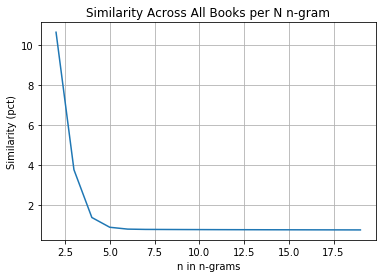

In [6]:
plt.plot(x,y, linestyle = '-')
#plt.plot(x,yall, linestyle = '--')
plt.xlabel('n in n-grams')
plt.ylabel('Similarity (pct)')
plt.title('Similarity Across All Books per N n-gram')
plt.grid()
plt.show()

### Running for Articles

In [11]:
x = []
y = []
yall = []

for n in range(2,20):
    
    art_comparison = compare_files(dir+'Assignment 3 Articles/',ngram_size=n,threshold=-1)
    a = np.zeros(len(art_comparison))
    counter = 0
    for key, value in art_comparison.items():
        a[counter] = value
        counter +=1
    #print str(n) + ":" + str(a.mean())
    x.append(n)
    yall.append(a*100)
    y.append(a.mean()*100)

In [16]:
arts = compare_files(dir+'Assignment 3 Articles/',ngram_size=3,threshold=-1)

In [24]:
y

[1.1525849160292323,
 0.2829374875878607,
 0.18810339771853202,
 0.1592294039682459,
 0.14324079853990626,
 0.13195360875092504,
 0.12141143032423929,
 0.11385569935094553,
 0.10754401139932575,
 0.10176017272925225,
 0.09757532797260038,
 0.09469462461893707,
 0.09181808112566595,
 0.08894565350741815,
 0.08607729812594153,
 0.08321297168481337,
 0.08068928654633054,
 0.07833355287732437]

In [23]:
np.mean([v for v in arts.values()])

0.002829374875878607

In [14]:
art_comparison

{'article1.txt,article2.txt': 0.0,
 'article1.txt,article3.txt': 0.0,
 'article10.txt,article1.txt': 0.0,
 'article10.txt,article12.txt': 0.0,
 'article10.txt,article13.txt': 0.04271356783919598,
 'article10.txt,article14.txt': 0.0,
 'article10.txt,article15.txt': 0.0,
 'article10.txt,article16.txt': 0.0,
 'article10.txt,article17.txt': 0.0,
 'article10.txt,article2.txt': 0.0,
 'article10.txt,article28.txt': 0.0,
 'article10.txt,article29.txt': 0.0,
 'article10.txt,article3.txt': 0.0,
 'article10.txt,article38.txt': 0.0,
 'article10.txt,article4.txt': 0.0,
 'article10.txt,article5.txt': 0.0,
 'article10.txt,article6.txt': 0.002631578947368421,
 'article10.txt,article7.txt': 0.0,
 'article11.txt,article1.txt': 0.0,
 'article11.txt,article10.txt': 0.0,
 'article11.txt,article12.txt': 0.0,
 'article11.txt,article13.txt': 0.0,
 'article11.txt,article14.txt': 0.0,
 'article11.txt,article15.txt': 0.0,
 'article11.txt,article16.txt': 0.0,
 'article11.txt,article17.txt': 0.0,
 'article11.txt,a

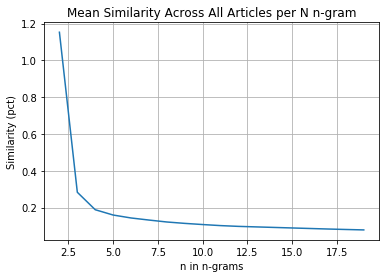

In [12]:
plt.plot(x,y, linestyle = '-')
#plt.plot(x,yall, linestyle = '--')
plt.xlabel('n in n-grams')
plt.ylabel('Similarity (pct)')
plt.title('Mean Similarity Across All Articles per N n-gram')
plt.grid()
plt.show()

## Books measuring similarity

After having our n for books chosen as '???', we'll examine the similairty of our set of books, and use a
threshold value of ???%. This threshold value will filter our any books with similarities below that value, in order
to allow us to focus on the most promininent combinations of books that are similar.

In [ ]:
books_comparison = compare_files(dir+'Books//',ngram_size=???,threshold=???)


for k,v in books_comparison.items():
    book1, book2 = k.split(',')
    similarity_index = v
    print ("1")
    print (str(book1) + " is similar to " + str(book2) + 
           " with a Similarity Index of " + '{percent:.3%}'.format(percent=similarity_index) +"\n" +"\n")

## Articles measuring similarity

After having our n for articles chosen as '???', we'll examine the similairty of our set of articles, and use a
threshold value of ???%. This threshold value will filter our any articles with similarities below that value, in
order to allow us to focus on the most promininent combinations of articles that are similar.

In [ ]:
articles_comparison = compare_files(dir+'Articles/',ngram_size=???,threshold=???)


for k,v in articles_comparison.items():
    art1, art2 = k.split(',')
    similarity_index = v
    print (str(art1) + " is similar to " + str(art2) + 
           " with a Similarity Index of " + '{percent:.3%}'.format(percent=similarity_index) +"\n" +"\n")